**<span style="font-size:30px;">IMDB Movies and Studios Analysis</span>**


![img](Images\imdb.jpg)


**<span style="font-size:20px;">Overview</span>**

This data analysis study project aims to explore the fascinating world of film to learn more about the domain of well-known movies and their commercial success. It goes beyond simple popularity to look at the box office performance patterns of blockbuster movies in an effort to identify the elements that led to their enormous success in regards to both its spread and revenues both locally and internationally.Descriptive analysis on the movies' domestic and foreign gross revenues and each studio that made the movies through data primarily fetched from IMDB

**<span style="font-size:20px;">Business Understanding</span>**



![img](Images\Director.jpg)


Microsoft may be able to get a considerable amount of revenue and popularity from their first movie.This may in turn create a snowballing effect thus giving it a much larger platform to make even better movies both in terms of quality and quantity.They may be able to bring up a TV Show if the first movie makes a major hit. This is done by examining the most recent developments in the movie business, paying particular attention to profitable box office results and determine the themes, genres, and features that appeal to viewers and generate high revenues at the box office including prominent directors that make successful movies.Its equally important to perform a detailed examination of popular films made by rivals and significant players in the field. These are all key factors for decesion making on a new and original movie studio using the data fetched from imdb,one of the best online movie databases out there,coupled with box office movies.

**<span style="font-size:20px;">Data Understanding</span>**

![img](Images\movies_money.jpg)

Some of the datasources used are primarily from the imdb which is the internet movies database containing tables filled with movies and details of said movies ie ratings and directors.Explored potential secondary sources of data such as box office movies and its revenues that contain both the domestic and foreign gross revenues earned by said movies.This will help in determining the most popular movies and movie genres together with famous movie producers and directors that lead the creation of the movies.Some of the datasets have different ratings but after strict filtering the best movies and info about said movies have been detailed below.

Imported libraries and modules:

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3

Called the bom.movie_gross.csv file and checked out the columns on the file to get an idea of what data is in the file and the info in it

In [38]:
bom_movie = pd.read_csv('Data/bom.movie_gross.csv')
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Created a connection to the imdb file using the sqlite3 module and loaded up the im.db file to get a feel of the data inside and looked at the tables that it contains


In [39]:
conn = sqlite3.connect('./Data/im.db')
pd.read_sql("""
            SELECT name FROM sqlite_master WHERE type='table';
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


**<span style="font-size:20px;">Data Preparation</span>**

In [40]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


As shown above there are some missing values in the studio,domestic gross and foreign gross columns
The title and year columns are all filled
The null values in the studio column though are very little so we'll check those out first and see if we can drop them

In [41]:
bom_movie.loc[bom_movie['studio'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


As seen above the movies that have studio as null values have made very little money when compared to the majority of the movies in the file and so it shall be dropped 

In [42]:
bom_movie = bom_movie.dropna(subset='studio')

After dropping said rows.Lets checkout the top movies based off of their foreign_gross and domestic gross group them by the studio that prodced them but foreign_gross is in string format so we should first convert to a float.We would strip all the commas from the strings in foreign gross and then convert them to float and replace the values with the new float values this will make it easier when using aggregate functions

In [43]:
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',','')
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'])

In [44]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


After fixing up the data type of the foreign gross column the next step would be to sort out the values to pick out the top ten movies based off of foreign gross that the movie earned and assigned it to a dataframe called top_10_movies_revenue

In [45]:
top_10_movies_revenue = bom_movie.sort_values(by=['foreign_gross','domestic_gross'], ascending=[False,False]).head(10)
top_10_movies_revenue

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


Created a dataframe called movie_info for the movie_info tsv file and observed the first 5 rows it contains to see if the data could be used for the project

In [46]:
movie_info = pd.read_csv('Data/rt.movie_info.tsv', delimiter='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Created a dataframe called movie_reviews for the reviews.tsv file and observed the first 5 rows it contains to see if the data could be used for the project

In [47]:
movie_reviews = pd.read_csv('Data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
movie_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Created a dataframe called tmovies for tmdb.movies.csc file and observed the first 5 rows it contains to see if the data could be used for the project

In [48]:
tmovies = pd.read_csv('Data/tmdb.movies.csv')
tmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [49]:
tmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Looked at the info of the tmovies above and its a full dataset that can be used without much cleaning.Its pretty good 

Sorted out the tmovies dataframe according to the vote average and the popularity as shown below and looked at the top 5 movies

In [50]:
tmovies = tmovies.sort_values(by=['vote_average','vote_count','popularity'], ascending=[False,False,False])
tmovies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3687,3687,"[35, 14, 18, 10749]",307124,en,Love on a Leash,1.400,2013-08-13,Love on a Leash,10.0,7
9199,9199,"[35, 14, 18, 10749]",307124,en,Love on a Leash,1.400,2013-08-13,Love on a Leash,10.0,7
19174,19174,[10402],411990,en,Endless,1.003,2016-08-19,Endless,10.0,4
12742,12742,[99],276913,en,Hidden Colors 3: The Rules of Racism,0.968,2014-06-26,Hidden Colors 3: The Rules of Racism,10.0,4
24326,24326,"[16, 12]",561974,ko,점박이 한반도의 공룡 2: 새로운 낙원,7.941,2018-12-31,Dino King 3D: Journey to Fire Mountain,10.0,3


It had some duplicates so its logical to remove it for a better data analysis also dropped the unnamed column and genre_ids since its data cannot be understood and printed out the first 10 movies



In [51]:
tmovies = tmovies.drop(['Unnamed: 0','genre_ids'], axis=1)
tmovies.drop_duplicates(inplace=True)
tmovies.head()

tmovies.head(10)

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3687,307124,en,Love on a Leash,1.400,2013-08-13,Love on a Leash,10.0,7
19174,411990,en,Endless,1.003,2016-08-19,Endless,10.0,4
12742,276913,en,Hidden Colors 3: The Rules of Racism,0.968,2014-06-26,Hidden Colors 3: The Rules of Racism,10.0,4
24326,561974,ko,점박이 한반도의 공룡 2: 새로운 낙원,7.941,2018-12-31,Dino King 3D: Journey to Fire Mountain,10.0,3
24612,541576,en,Meeting Gorbachev,5.870,2019-05-03,Meeting Gorbachev,10.0,3
25449,552095,en,PAW PATROL: Mighty Pups,1.963,2018-09-11,PAW PATROL: Mighty Pups,10.0,3
15905,362542,en,The Corrs: BBC Radio 2 Live at Hyde Park,0.956,2015-10-13,The Corrs: BBC Radio 2 Live at Hyde Park,10.0,3
19224,393789,en,Killer,0.943,2016-01-16,Killer,10.0,3
16026,514793,en,AS:VS Back in Business,0.840,2015-05-28,AS:VS Back in Business,10.0,3
16188,539820,en,Beyoncé: Live At Global Citizen Festival 2015,0.743,2015-09-26,Beyoncé: Live At Global Citizen Festival 2015,10.0,3


Created a dataframe called movie_budgets and opened the movie_budgets.csv file and looked at the info of the data entries and the columns

In [52]:
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The movie_budgets is a full dataset with no null values thus can be worked with without much cleaning to do.An excellent dataset.Looked at the first 5 rows of the dataset to get a feel of the data

In [53]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The production_budget,domestic_gross and worldwide gross are all in string format and they are numbers that could be used also theres commas in between 3 digits so that would have to be stripped off together with the dollar sign($) and converted to floats to be used .This will be done in the cell below

In [54]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '').str.replace('$','').astype('float')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '').str.replace('$','').astype('float')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$','').astype('float')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Arranged the movie_budgets based off of the most earned worldwide_gross,domestic_gross and production_budget

In [55]:
movie_budgets = movie_budgets.sort_values(by=['worldwide_gross','domestic_gross','production_budget'],ascending=[False,False,True])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09


Whoa thats a lot of money

Nice now to the im.db file created a function called readsql where the argument would be an sql query and it will return a result

In [56]:
def readsql(query):
    return pd.read_sql(query, conn)

Created a dataframe called Imdb list that joins the movie_ratings and movie basics using movie_id

In [57]:
imdblist = readsql("""SELECT *
FROM movie_basics
JOIN movie_ratings USING(movie_id)
""")
imdblist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [58]:
imdblist.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Since the start year is in integer format and its just years and for the movie_budget dataframe has the date month and year creating another column called year would be ideal for merging the two data frames so that we dont have two movies with a commonn name mixed together

In [59]:
movie_budgets['year'] = movie_budgets['release_date'].astype(str).str[-4:]    
movie_budgets['year'] = movie_budgets['year'].astype('int64')
imdb_budget = pd.merge(movie_budgets,imdblist,left_on=['movie', 'year'],right_on=['primary_title','start_year'])
imdb_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,2015,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074
3,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,2012,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594


Now that its all merged up removing the columns which are duplicated would be the next step. Columns to be removed would be original title,primary_title,start_year,release_Date,id,runtime_minutes

In [60]:
imdb_budget = imdb_budget.drop(['original_title','primary_title','start_year','release_date','id','runtime_minutes'], axis=1)
imdb_budget.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,genres,averagerating,numvotes
0,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,tt4154756,"Action,Adventure,Sci-Fi",8.5,670926
1,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338
2,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,tt2820852,"Action,Crime,Thriller",7.2,335074
3,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,tt0848228,"Action,Adventure,Sci-Fi",8.1,1183655
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594


Now thats pretty neat so the next step would be to drop duplicates and arrange the based off of gross rating.A movie can only make the most money if it was the most watched since the more people watch it and buy DVDs and go to cinema the more the movie earns so it'll be arranged based off of worldwide_gross and avergaerating and numvotes

In [61]:
imdb_budget = imdb_budget.sort_values(['worldwide_gross','averagerating','numvotes'], ascending=[False,False,False]).drop_duplicates()

In [77]:
imdb_budget.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,genres,averagerating,numvotes
0,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,tt4154756,"Action,Adventure,Sci-Fi",8.5,670926
1,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338
2,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,tt2820852,"Action,Crime,Thriller",7.2,335074
3,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,tt0848228,"Action,Adventure,Sci-Fi",8.1,1183655
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594
5,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,tt1825683,"Action,Adventure,Sci-Fi",7.3,516148
6,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,2018,tt4881806,"Action,Adventure,Sci-Fi",6.2,219125
7,Frozen,150000000.0,400738009.0,1.272470e+09,2013,tt2294629,"Adventure,Animation,Comedy",7.5,516998
8,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,2017,tt2771200,"Family,Fantasy,Musical",7.2,238325
9,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018,tt3606756,"Action,Adventure,Animation",7.7,203510


Created a dataframe called directors_writers that joins the directors and persons tables and groups them by the person id.We would then display the first 5 rows of the dataframe and picked only those that can still direct a movie physically

In [63]:
directors_writers = readsql("""
        SELECT *
        FROM directors
        JOIN persons USING(person_id)
        GROUP BY person_id
        HAVING death_year IS NULL
""")
directors_writers.head()

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt3715320,nm0000095,Woody Allen,1935.0,None,"writer,director,actor"
1,tt2239822,nm0000108,Luc Besson,1959.0,None,"writer,producer,director"
2,tt7657566,nm0000110,Kenneth Branagh,1960.0,None,"actor,producer,director"
3,tt1757678,nm0000116,James Cameron,1954.0,None,"writer,producer,director"
4,tt1369706,nm0000118,John Carpenter,1948.0,None,"soundtrack,writer,music_department"


Dropped the column duplicates in the dataframe and merged it to movie budget dataframe

In [78]:
#directors_writers = directors_writers.T.drop_duplicates().T
movie_budgets = pd.merge(imdb_budget,directors_writers,on='movie_id')
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594,nm0923736,Joss Whedon,1964.0,None,"writer,producer,director"
1,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,2018,tt4881806,"Action,Adventure,Sci-Fi",6.2,219125,nm1291105,J.A. Bayona,1975.0,None,"director,writer,actor"
2,Frozen,150000000.0,400738009.0,1.272470e+09,2013,tt2294629,"Adventure,Animation,Comedy",7.5,516998,nm0118333,Chris Buck,1958.0,None,"animation_department,director,writer"
3,Frozen,150000000.0,400738009.0,1.272470e+09,2013,tt2294629,"Adventure,Animation,Comedy",7.5,516998,nm1601644,Jennifer Lee,1971.0,None,"writer,miscellaneous,producer"
4,Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,2016,tt3498820,"Action,Adventure,Sci-Fi",7.8,583507,nm0751577,Anthony Russo,1970.0,None,"producer,director,writer"


We have duplicates since some movies were directed by more than one director but for now we'll just leave it as is since the directors are super important in the upcoming data analysis

**<span style="font-size:20px;">Data Analysis</span>**

Using the imdb_budget dataframe the top 10 movies based off of worldwise_gross revenue is obtained and we'll assign the dataframe to top_10_movies_revenue.Since the movie_budgets are already assigned as so we'd just take the first 10 movies

In [83]:
top_10_movies_revenue = imdb_budget.loc[:10,['movie','production_budget','worldwide_gross']]
top_10_movies_revenue

,movie,production_budget,worldwide_gross
0,Avengers: Infinity War,300000000.0,2.048134e+09
1,Jurassic World,215000000.0,1.648855e+09
2,Furious 7,190000000.0,1.518723e+09
3,The Avengers,225000000.0,1.517936e+09
4,Avengers: Age of Ultron,330600000.0,1.403014e+09
5,Black Panther,200000000.0,1.348258e+09
6,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09
7,Frozen,150000000.0,1.272470e+09
8,Beauty and the Beast,160000000.0,1.259200e+09
9,Incredibles 2,200000000.0,1.242521e+09


Finding the genres of the movies above to see which genres are the most profitable when creating a movie.By creating a dataframe called top_10_genres and assigning the genres from the top 10 movies it'll be easier to find the most profitable genres 

In [97]:
genre_list = imdb_budget.loc[:10,'genres'].str.split(',').to_list()
genre_list_new=[]
for listt in genre_list:
    for genre in listt:
        genre_list_new.append(genre)
from collections import Counter
genre_counts = Counter(genre_list_new)
genre_counts


Counter({'Action': 9,
         'Adventure': 8,
         'Sci-Fi': 6,
         'Crime': 2,
         'Thriller': 2,
         'Animation': 2,
         'Comedy': 1,
         'Family': 1,
         'Fantasy': 1,
         'Musical': 1})

Above is a list of the top 10 genres arranged in order and the number of times each genre appears in the top 10 movies based off of revenue .It seems that Action genre is the most popular and profitable genre followed by Adventure then Sci-Fi so when making a movie it would be advised to probably stick to those three genres for the most profit

Taking a look at the directors of the top 10 movies is really important when coming to making a movie since it'll better allow the company to choose the right man for the job since looking at their past success gives the confidence required when coming up with an original and successfull movie.Below a dataframe called top_10_movie direcotors will be created and it'll have the names of the top 10 movie direcors and the movies theyre known for

In [122]:
top_10_movie_directors = movie_budgets.loc[:15, ['movie','primary_name','person_id','movie_id']]
top_10_movie_directors

,movie,primary_name,person_id,movie_id
0,Avengers: Age of Ultron,Joss Whedon,nm0923736,tt2395427
1,Jurassic World: Fallen Kingdom,J.A. Bayona,nm1291105,tt4881806
2,Frozen,Chris Buck,nm0118333,tt2294629
3,Frozen,Jennifer Lee,nm1601644,tt2294629
4,Captain America: Civil War,Anthony Russo,nm0751577,tt3498820
5,Captain America: Civil War,Joe Russo,nm0751648,tt3498820
6,Transformers: Dark of the Moon,Michael Bay,nm0000881,tt1399103
7,Captain Marvel,Ryan Fleck,nm0281396,tt4154664
8,Captain Marvel,Anna Boden,nm1349818,tt4154664
9,Skyfall,Sam Mendes,nm0005222,tt1074638


So by hiring the top 10 movie directors to make a new movie the chances of success of said movie would be high


**<span style="font-size:20px;">Data Visualization</span>**

Made a bar chart on the 

c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


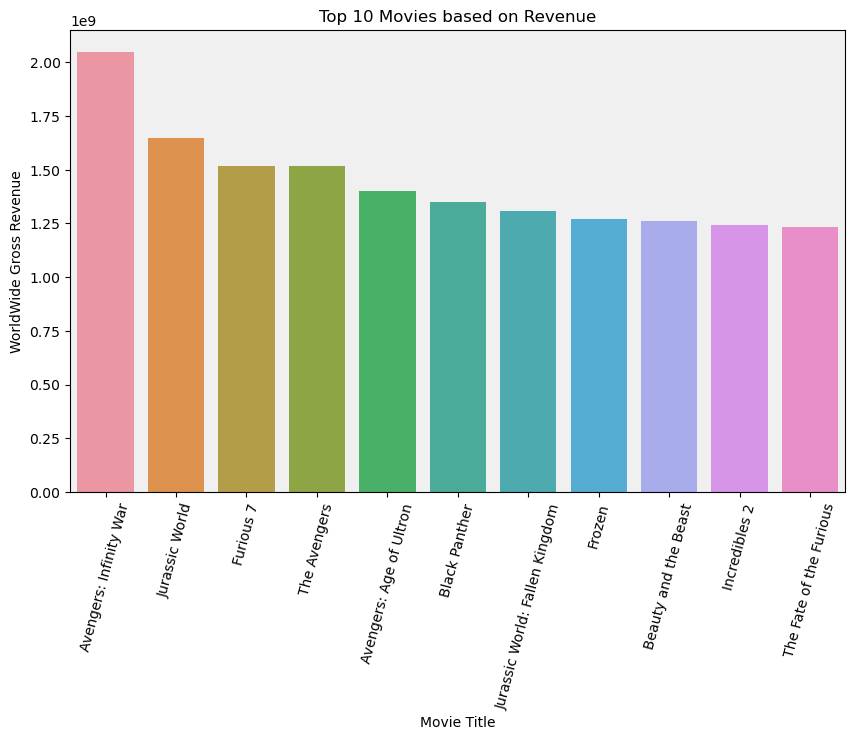

In [136]:
movie_revenue, ax = plt.subplots(figsize=(10,6));
sns.barplot(x=top_10_movies_revenue['movie'], y=top_10_movies_revenue['worldwide_gross']);
ax.set_xlabel('Movie Title');
ax.set_ylabel('WorldWide Gross Revenue');
ax.set_title('Top 10 Movies based on Revenue');
plt.gca().set_facecolor('#f0f0f0') 
plt.xticks(rotation = 75);
plt.show();

c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Icey\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cate

<function matplotlib.pyplot.show(close=None, block=None)>

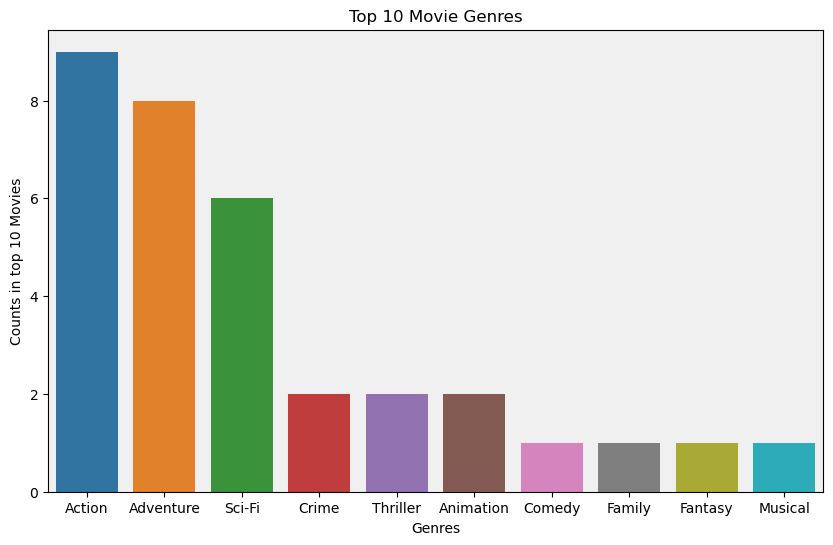

In [ ]:
top_10_genre, ax = plt.subplots(figsize=(10,6))
genree = list(genre_counts.keys())
genre_no = list(genre_counts.values())
sns.barplot(x=genree, y=genre_no)
ax.set_xlabel('Genres')
ax.set_ylabel('Counts in top 10 Movies')
plt.gca().set_facecolor('#f0f0f0') 
ax.set_title('Top 10 Movie Genres')
plt.show